<a href="https://colab.research.google.com/github/aigonna/ML_Skills/blob/main/6_lr_scheduler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers -qq

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import transformers
%matplotlib inline
# plt.rcParams['savefig.dpi'] = 250 #图片像素
# plt.rcParams['figure.dpi'] = 250 #分辨率

## 1.LambdaLR

In [ ]:
num_epochs = 100

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=100)
lambda1 = lambda epoch: 0.95 ** epoch #按照0.95的epoch的次方衰减
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lambda1) #按照lambda1衰减

In [ ]:
lrs = []
for i in range(num_epochs):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

In [ ]:
lrs[:3]

[100.0, 95.0, 90.25]

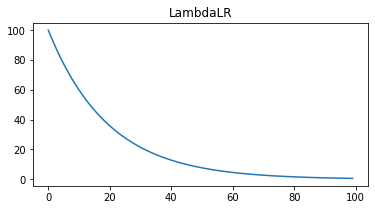

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("LambdaLR")
plt.show()

## 2. MultiplicativeLR

In [ ]:
num_epochs = 20

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=100)
lambda1 = lambda epoch: 0.7
scheduler = optim.lr_scheduler.MultiplicativeLR(optimizer, lambda1)#不断乘以lambda1

In [ ]:
lrs = []
for i in range(num_epochs):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

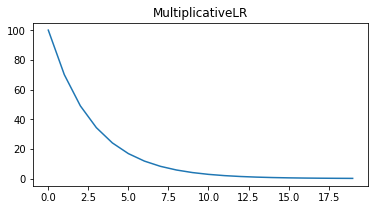

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("MultiplicativeLR")
plt.show()

In [ ]:
lrs[:5]

[100, 70.0, 49.0, 34.3, 24.009999999999998]

## 3.Step LR

In [ ]:
num_epochs = 20

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=100)

#每隔step_size步降为lr * gamma
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

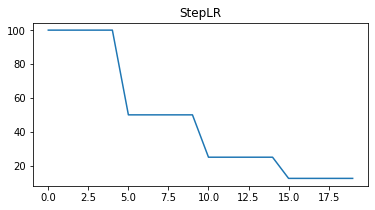

In [ ]:
lrs = []
for i in range(num_epochs):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("StepLR")
plt.show()

## 4.MultiStepLR

In [ ]:
num_epochs = 30

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=100)

#每隔milestones列表对应步数步降为lr * gamma
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 15, 20], gamma=0.4)

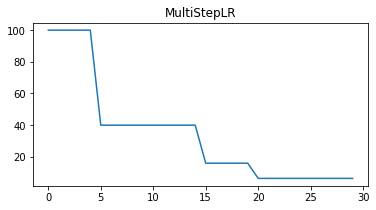

In [ ]:
lrs = []
for i in range(num_epochs):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("MultiStepLR")
plt.show()

## 5.ExponentialLR

In [ ]:
num_epochs = 30

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=100)

#lr变为gamma * lr last_epoch默认-1,指最后一个迭代epoch的索引
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1, last_epoch=-1)

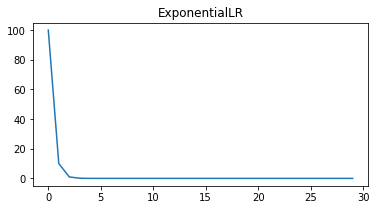

In [ ]:
lrs = []
for i in range(num_epochs):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("ExponentialLR")
plt.show()

In [ ]:
lrs[:5]

[100, 10.0, 1.0, 0.1, 0.010000000000000002]

## 6.CosineAnnealingLR
- [余弦退火](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.CosineAnnealingLR.html)
<br></br>
<img src="https://gitee.com/miller999999/bpic/raw/master/img/blog/202112050033328.png" alt="image-20211205003309165" width=40% style="zoom:10%;" />
<br></br>
如果last_epoch=-1,初始学习率设置为lr就变为上式.这时默认eta_min=0,那么会以2$T_{max}$为周期进行lr迭代

In [ ]:
num_epochs = 20

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=100)

#lr以2倍T_max近似迭代
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=5)

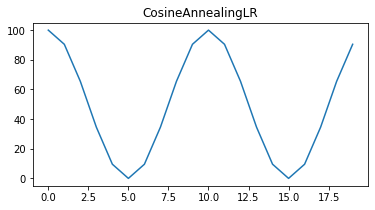

In [ ]:
lrs = []
for i in range(num_epochs):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("CosineAnnealingLR")
plt.show()

## 7.ReduceLROnPlateau

In [ ]:
num_epochs = 20

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=100)

#lr*0.3监测到比如loss等指标不变mode=‘min'小3个epoch衰减
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3, patience=3)

In [ ]:
# lrs = []
# for i in range(num_epochs):
#     optimizer.step()
#     lrs.append(optimizer.param_groups[0]['lr'])
#     scheduler.step()

# plt.figure(figsize=(6, 3))
# plt.plot(lrs)
# plt.title("ReduceLROnPlateau")
# plt.show()

## 8.CyclicLR

In [ ]:
num_epochs = 20

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=100)

#lr以triangular形态迭代 最大1e-3
scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=2e-5, max_lr=1e-3, step_size_up=5, mode='triangular')

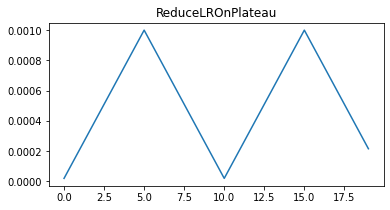

In [ ]:
lrs = []
for i in range(num_epochs):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("ReduceLROnPlateau")
plt.show()

##9.OneCycleLR
学习率首先从初始值上升至max_lr，之后从max_lr下降至低于初始值的大小

In [ ]:
n_epochs = 100

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)

#学习率首先从初始值上升至max_lr，之后从max_lr下降至低于初始值的大小
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, epochs=n_epochs, steps_per_epoch=10)

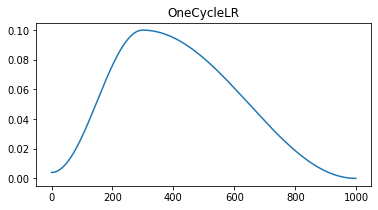

In [ ]:
lrs = []
for i in range(1000):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("OneCycleLR")
plt.show()

In [ ]:
lrs[:10]

[0.0040000000000000036,
 0.00400264950421679,
 0.004010597724372428,
 0.004023843783015152,
 0.004042386217832955,
 0.004066222981815026,
 0.004095351443477752,
 0.00412976838715523,
 0.004169470013354215,
 0.004214451939173636]

##10.CosineAnnealingWarmRestarts

In [ ]:
n_epochs = 100

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)

#学习率第一次回到初始值位置T_0 T_mult表示第二次回到初始值位置为T_0+2T_0=3T_0 后面依次为5T_0
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

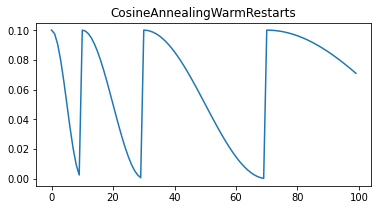

In [ ]:
lrs = []
for i in range(n_epochs):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("CosineAnnealingWarmRestarts")
plt.show()

##11.get_constant_schedule_with_warmup

In [ ]:
total_samples = 512
bs = 16
n_epochs = 10

num_warmup_steps = (total_samples // bs) * 2
num_total_steps = (total_samples // bs) * n_epochs

In [ ]:
model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)
#num_warmup_steps这么多步数达到constant lr,如上面0.1
scheduler = transformers.get_constant_schedule_with_warmup(optimizer,
                num_warmup_steps=num_warmup_steps,)

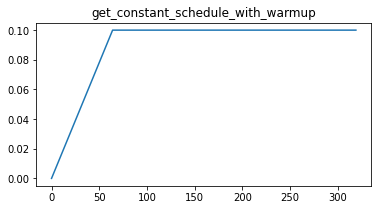

In [ ]:
lrs = []
for i in range(num_total_steps):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("get_constant_schedule_with_warmup")
plt.show()

##12.get_cosine_schedule_with_warmup
以预热步数线性预热到最大然后cos衰减

In [ ]:
model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)
#num_warmup_steps这么多步数达到max lr,如上面0.1
scheduler = transformers.get_cosine_schedule_with_warmup(optimizer,
                num_warmup_steps=num_warmup_steps,
                num_training_steps=num_total_steps
                )

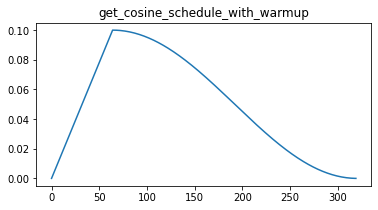

In [ ]:
lrs = []
for i in range(num_total_steps):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("get_cosine_schedule_with_warmup")
plt.show()

## 13.get_cosine_with_hard_restarts_schedule_with_warmup


In [ ]:
total_samples = 512
bs = 16
n_epochs = 10
num_cycles = 3

num_warmup_steps = (total_samples // bs) * 2
num_training_steps = (total_samples // bs) * n_epochs

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)
#num_warmup_steps这么多步数达到max lr,剩下步数形成num_cycles个衰减周期
scheduler = transformers.get_cosine_with_hard_restarts_schedule_with_warmup(optimizer,
                                    num_warmup_steps=num_warmup_steps,
                                    num_training_steps=num_training_steps,
                                    num_cycles=num_cycles
                                    )

Num_warmup_steps:    64
num_training_steps: 320
Recycles every:      85 step.


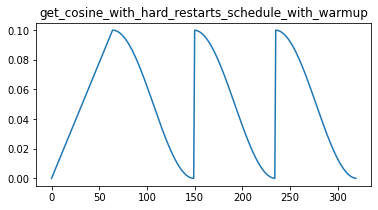

In [ ]:
print(f"Num_warmup_steps: {num_warmup_steps:>5}")
print(f"num_training_steps: {num_training_steps}")
print(f"Recycles every: {int((num_training_steps - num_warmup_steps) / num_cycles):>7} step.")

lrs = []
for i in range(num_total_steps):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("get_cosine_with_hard_restarts_schedule_with_warmup")
plt.show()

##14.get_linear_schedule_with_warmup

In [ ]:
total_samples = 512
bs = 16
n_epochs = 10
num_cycles = 3

num_warmup_steps = (total_samples // bs) * 2
num_training_steps = (total_samples // bs) * n_epochs

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)
#num_warmup_steps这么多步数达到max lr,剩下步数线性衰减到0
scheduler = transformers.get_linear_schedule_with_warmup(optimizer,
                        num_warmup_steps=num_warmup_steps,
                        num_training_steps=num_training_steps,
                        
                        )

Num_warmup_steps:    64
num_training_steps: 320


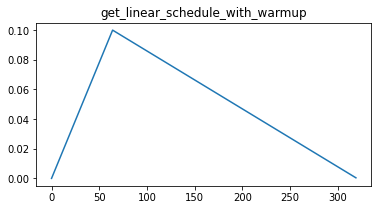

In [ ]:
print(f"Num_warmup_steps: {num_warmup_steps:>5}")
print(f"num_training_steps: {num_training_steps}")


lrs = []
for i in range(num_total_steps):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("get_linear_schedule_with_warmup")
plt.show()

In [ ]:
total_samples = 512
bs = 16
n_epochs = 10
power = 3

num_warmup_steps = (total_samples // bs) * 2
num_training_steps = (total_samples // bs) * n_epochs

model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)
#num_warmup_steps这么多步数达到max lr,剩下e^power次方衰减到0
scheduler = transformers.get_polynomial_decay_schedule_with_warmup(optimizer,
                        num_warmup_steps=num_warmup_steps,
                        num_training_steps=num_training_steps,
                        power=power,
                        
                        )

Num_warmup_steps:    64
num_training_steps: 320


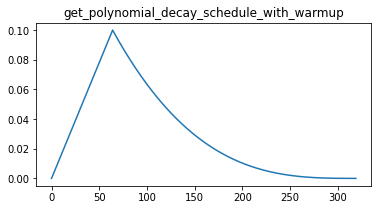

In [ ]:
print(f"Num_warmup_steps: {num_warmup_steps:>5}")
print(f"num_training_steps: {num_training_steps}")


lrs = []
for i in range(num_total_steps):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

plt.figure(figsize=(6, 3))
plt.plot(lrs)
plt.title("get_polynomial_decay_schedule_with_warmup")
plt.show()